In [1]:
import numpy as np

In [2]:
np.random.seed(1)
data = np.random.randint(1, 20, 20)

# Central Tendency

In [3]:
data

array([ 6, 12, 13,  9, 10, 12,  6, 16,  1, 17,  2, 13,  8, 14,  7, 19,  6,
       19, 12, 11])

## Mean

In [4]:
mean = np.mean(data)
print("Mean:", mean)


Mean: 10.65


### Removing outlier

In [5]:
data_with_outlier = np.concatenate([data, np.arange(100, 102)])

In [6]:
data_with_outlier

array([  6,  12,  13,   9,  10,  12,   6,  16,   1,  17,   2,  13,   8,
        14,   7,  19,   6,  19,  12,  11, 100, 101])

In [7]:
mean_with_outlier = np.mean(data_with_outlier)
print("Mean with outlier:", mean_with_outlier)

Mean with outlier: 18.818181818181817


In [8]:
outlier_percent = .1
num_data = data_with_outlier.shape[0]
num_clip = int(num_data * outlier_percent)
clipped_data = data_with_outlier[num_clip: num_data-num_clip]
clipped_data

array([13,  9, 10, 12,  6, 16,  1, 17,  2, 13,  8, 14,  7, 19,  6, 19, 12,
       11])

In [9]:
clipped_mean = np.mean(clipped_data)
print("Clipped mean:", clipped_mean)

## Median

In [10]:
data_sorted = np.sort(data)
data_sorted

array([ 1,  2,  6,  6,  6,  7,  8,  9, 10, 11, 12, 12, 12, 13, 13, 14, 16,
       17, 19, 19])

In [11]:

num_data = data_sorted.shape[0]
num_by_2 = int(num_data / 2)
if num_data % 2 is 0:
    median = (data_sorted[num_by_2] + data_sorted[num_by_2 + 1]) / 2
else:
    median = data_sorted[num_by_2]
    
print("Median:", median)


Median: 12.0


### Median for grouped data

In [15]:
import pandas as pd

In [16]:
grouped_data = []
for min_range in range(1, 20, 4):
    data_in_range = data[min_range <= data]
    # print(data_in_range)
    data_in_range = data_in_range[data_in_range <= (min_range + 3)]
    # print(data_in_range)
    grouped_data.append([min_range, min_range + 3, data_in_range.shape[0]])

grouped_data


[[1, 4, 2], [5, 8, 5], [9, 12, 6], [13, 16, 4], [17, 20, 3]]

In [17]:
data_frame = pd.DataFrame(grouped_data, columns=['min', 'max', 'frequency'])
data_frame

,min,max,frequency
0,1,4,2
1,5,8,5
2,9,12,6
3,13,16,4
4,17,20,3


In [18]:
N = data_frame.frequency.sum()
N2 = int(N/2)
cumulative_sum = 0
freq1 = 0

L1, med_freq, width = [0] * 3
for i, row in data_frame.iterrows():
    cumulative_sum += row.frequency
    if cumulative_sum >= N2:
        L1 = row['min']
        med_freq = row.frequency
        width = (row['max'] - row['min'] + 1)
        break
    freq1 = cumulative_sum

median_grouped = L1 + ((N2 - freq1) / med_freq) * width

print("Grouped Median:", median_grouped)

## Mode

In [19]:
uniques, counts = np.unique(data, return_counts=True)
index = np.argmax(counts)
modes = uniques[counts == np.max(counts)]
print("Mode:", modes[0] if len(modes) is 0 else modes)

Mode: [ 6 12]


## Midrange

In [20]:
minimum = np.min(data)
maximum = np.max(data)
mid_range = (minimum + maximum) / 2
print("Mid-range:", mid_range)

Mid-range: 10.0


# Symmetry

## Symmetric Data

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
np.random.seed(4)
mu, sigma = 0, 1
normal_data = np.random.normal(mu, sigma, 1000)

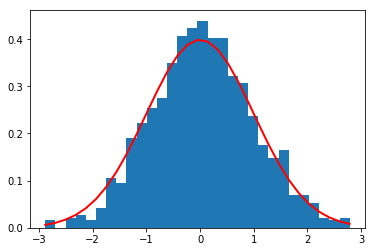

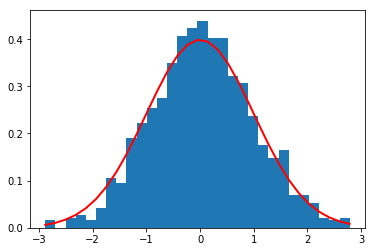

In [26]:
count, bins, ignored = plt.hist(normal_data, 30, density=True)
plt.plot(bins, 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - mu) ** 2 / (2 * sigma ** 2)), linewidth=2, color='r')


## Asymmetric Data

প্যারা লাগে। করুম না। :/

# Measuring Dispersion

## Range

In [27]:
minimum = np.min(data)
maximum = np.max(data)
rng = (minimum, maximum)
print("Range:", rng)

Range: (1, 19)


## Quantiles

### 4-Quantile

In [28]:
num_data = data.shape[0]
quartile_size = int(num_data/4)
quartiles = [data_sorted[i] for i in range(quartile_size, num_data, quartile_size)]

print("Quartiels:", quartiles)

Quartiels: [7, 12, 14]


### Inter Quartile Range

In [29]:
print("Inter Quartile Range:", quartiles[2] - quartiles[0])

### Five Number Summary

In [30]:
five_number_summary = [minimum] + quartiles + [maximum]
print("Five Number Summary:", five_number_summary)

## Variance

$$ \sigma = \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2  $$ 

In [31]:
mean = np.mean(data)
variance = np.sum([(x - mean) ** 2 for x in data]) / num_data
print("Variance:", variance)

## Standard Deviation

In [32]:
std_dev = np.sqrt(variance)

print("Standard Deviation:", std_dev)

# Proximity Measure

## Nominal Data

In [33]:
np.random.seed(4)

test = np.array(["W", "X", "Y", "Z"])
nominal_df = pd.DataFrame()
nominal_df['Name'] = ["A", "B", "C", "D", "E"]
nominal_df['TestA'] = test[np.random.randint(0, 4, 5)]
nominal_df['TestB'] = test[np.random.randint(0, 4, 5)]
nominal_df['TestC'] = test[np.random.randint(0, 4, 5)]

In [34]:
nominal_df

,Name,TestA,TestB,TestC
0,A,Y,W,Y
1,B,Y,Z,W
2,C,Z,W,Z
3,D,X,Y,X
4,E,X,X,Y


### Ratio Mismatch

In [35]:
objects = nominal_df.Name
num_object = len(objects)
p = 3
dissimilarity_matrix = np.zeros((num_object, num_object))

In [36]:
for i, row1 in nominal_df.iterrows():
    for j, row2 in nominal_df.iterrows():
        if i is j:
            continue
        match_count = 0
        for k in range(1, 4):
            if row1[k] == row2[k]:
                match_count += 1
        dissimilarity_matrix[i][j] = (p - match_count) / p

names = nominal_df.Name.tolist()
dissimilarity_matrix = pd.DataFrame(
    dissimilarity_matrix, 
    index=names, 
    columns=names
)


In [37]:
dissimilarity_matrix

,A,B,C,D,E
A,0.000000,0.666667,0.666667,1.000000,0.666667
B,0.666667,0.000000,1.000000,1.000000,1.000000
C,0.666667,1.000000,0.000000,1.000000,1.000000
D,1.000000,1.000000,1.000000,0.000000,0.666667
E,0.666667,1.000000,1.000000,0.666667,0.000000


### Using Asymmetric Binary Attributes

প্যারা লাগে। :/

## Binary Attributes

## Symmetric Binary

In [38]:
np.random.seed(5)

yn = np.array(["Yes", "No"])
gender = np.array(["Male", "Female"])
mentality = np.array(["Optimistic", "Pessimistic"])

sym_bin_df = pd.DataFrame()
sym_bin_df["Name"] = ["Sam", "Tusi", "Mike", "Bale", "Kane"]
sym_bin_df["Employed"] = yn[np.random.randint(0, 2, 5)]
sym_bin_df["Gender"] = gender[np.random.randint(0, 2, 5)]
sym_bin_df["Mentality"] = mentality[np.random.randint(0, 2, 5)]

In [39]:
sym_bin_df

,Name,Employed,Gender,Mentality
0,Sam,No,Male,Pessimistic
1,Tusi,Yes,Male,Optimistic
2,Mike,No,Female,Pessimistic
3,Bale,No,Male,Optimistic
4,Kane,Yes,Male,Optimistic


	|       | True  | False | sum           |
	| ----- | ----- | ----- | ------------- |
	| True  | q     | r     | q + r         |
	| False | s     | t     | s + t         |
	| sum   | q + s | r + t | q + r + s + t |

In [40]:
names = sym_bin_df.Name.tolist()
num_object = len(names)
dissimilarity_matrix = np.zeros((num_object, num_object))

In [41]:
values = [yn, gender, mentality]

for i, row1 in sym_bin_df.iterrows():
    for j, row2 in sym_bin_df.iterrows():
        q, r, s, t = [0] * 4
        for k in range(1, 4):
            if row1[k] == values[k - 1][0] and row2[k] == values[k - 1][0]:
                q += 1
            elif row1[k] == values[k - 1][0] and row2[k] == values[k - 1][1]:
                r += 1
            elif row1[k] == values[k - 1][1] and row2[k] == values[k - 1][0]:
                s += 1
            else:
                t += 1
        dissimilarity_matrix[i][j] = (r + s) / (q + r + s + t)
        
dissimilarity_df = pd.DataFrame(
    dissimilarity_matrix,
    index=names,
    columns=names
)


In [42]:
dissimilarity_df

,Sam,Tusi,Mike,Bale,Kane
Sam,0.000000,0.666667,0.333333,0.333333,0.666667
Tusi,0.666667,0.000000,1.000000,0.333333,0.000000
Mike,0.333333,1.000000,0.000000,0.666667,1.000000
Bale,0.333333,0.333333,0.666667,0.000000,0.333333
Kane,0.666667,0.000000,1.000000,0.333333,0.000000


### Asymmetric Binary

In [43]:
np.random.seed(5)

asym_bin_df = pd.DataFrame()
asym_bin_df['Name'] = ["Sam", "Tusi", "Mike", "Bale", "Kane"]
for col in ['Football', 'Rugby', 'Cricket', 'Tennis', 'Ludo', 'Chess']:
    asym_bin_df[col] = yn[np.random.randint(0, 2, 5)]

In [44]:
asym_bin_df

,Name,Football,Rugby,Cricket,Tennis,Ludo,Chess
0,Sam,No,Yes,No,Yes,No,No
1,Tusi,Yes,Yes,Yes,No,No,No
2,Mike,No,No,No,Yes,Yes,No
3,Bale,No,Yes,Yes,No,No,No
4,Kane,Yes,Yes,Yes,No,Yes,Yes


In [46]:
n = len(asym_bin_df)
dissimilarity_matrix = np.zeros((n, n))

for i, row1 in asym_bin_df.iterrows():
    for j, row2 in asym_bin_df.iterrows():
        q, r, s = [0] * 3
        for k in range(1, 7):
            if row1[k] == yn[0] and row2[k] == yn[0]:
                q += 1
            elif row1[k] == yn[0] and row2[k] == yn[1]:
                r += 1
            elif row1[k] == yn[1] and row2[k] == yn[0]:
                s += 1
        dissimilarity_matrix[i][j] = (r + s) / (q + r + s)
        



In [48]:
names = asym_bin_df.Name.tolist()
asym_bin_prox = pd.DataFrame(dissimilarity_matrix, columns=names, index=names)

In [49]:
asym_bin_prox

,Sam,Tusi,Mike,Bale,Kane
Sam,0.000000,0.750000,0.666667,0.666667,0.833333
Tusi,0.750000,0.000000,1.000000,0.333333,0.400000
Mike,0.666667,1.000000,0.000000,1.000000,0.833333
Bale,0.666667,0.333333,1.000000,0.000000,0.600000
Kane,0.833333,0.400000,0.833333,0.600000,0.000000


## Ordinal Data

In [51]:
np.random.seed(5)

performance = np.array(["good", "avg", "bad"])
height = np.array(["tall", "medium", "short"])
mentality = np.array(["optimistic", "content", "pessimistic"])

ord_df = pd.DataFrame()
ord_df['Name'] = ["Sam", "Tsi", "Mike", "Bale", "Kane"]
ord_df['Performance'] = performance[np.random.randint(0, 3, 5)]
ord_df['Height'] = height[np.random.randint(0, 3, 5)]
ord_df['Mentality'] = mentality[np.random.randint(0, 3, 5)]

In [52]:
ord_df

,Name,Performance,Height,Mentality
0,Sam,bad,medium,pessimistic
1,Tsi,avg,tall,optimistic
2,Mike,bad,tall,optimistic
3,Bale,bad,short,content
4,Kane,good,tall,content


In [53]:
normalized = {}
for i, p in enumerate(performance):
    normalized[p] = i / 2
for i, h in enumerate(height):
    normalized[h] = i / 2
for i, m in enumerate(mentality):
    normalized[m] = i / 2


In [54]:
normalized

{'good': 0.0,
 'avg': 0.5,
 'bad': 1.0,
 'tall': 0.0,
 'medium': 0.5,
 'short': 1.0,
 'optimistic': 0.0,
 'content': 0.5,
 'pessimistic': 1.0}

In [55]:
n = len(ord_df)
ord_prox_mat = np.zeros((n, n))

for i, row1 in ord_df.iterrows():
    for j, row2 in ord_df.iterrows():
        cumulative_sum = 0
        for k in range(1, 4):
            cumulative_sum += (normalized[row1[k]] - normalized[row2[k]]) ** 2
        ord_prox_mat[i][j] = np.sqrt(cumulative_sum)

In [58]:
names = ord_df.Name.tolist()

ord_prox_df = pd.DataFrame(ord_prox_mat, columns=names, index=names)
ord_prox_df

,Sam,Tsi,Mike,Bale,Kane
Sam,0.000000,1.224745,1.118034,0.707107,1.224745
Tsi,1.224745,0.000000,0.500000,1.224745,0.707107
Mike,1.118034,0.500000,0.000000,1.118034,1.118034
Bale,0.707107,1.224745,1.118034,0.000000,1.414214
Kane,1.224745,0.707107,1.118034,1.414214,0.000000
